In [57]:
import pandas as pd
import numpy as np
from sklearn.cluster import MeanShift

In [10]:
df = pd.read_csv('checkins.csv')
df.head()

,id,user_id,venue_id,latitude,longitude,created_at
0,984222,15824,5222,38.895112,-77.036366,2012-04-21 17:43:47
1,984234,44652,5222,33.800745,-84.410520,2012-04-21 17:43:43
2,984291,105054,5222,45.523452,-122.676207,2012-04-21 17:39:22
3,984318,2146539,5222,40.764462,-111.904565,2012-04-21 17:35:46
4,984232,93870,380645,33.448377,-112.074037,2012-04-21 17:38:18


In [16]:
clf = MeanShift(bandwidth=0.1)
# data_set = df[:100000][['latitude', 'longitude']]
clf.fit(df[:100000][['latitude', 'longitude']])

MeanShift(bandwidth=0.1, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=1, seeds=None)

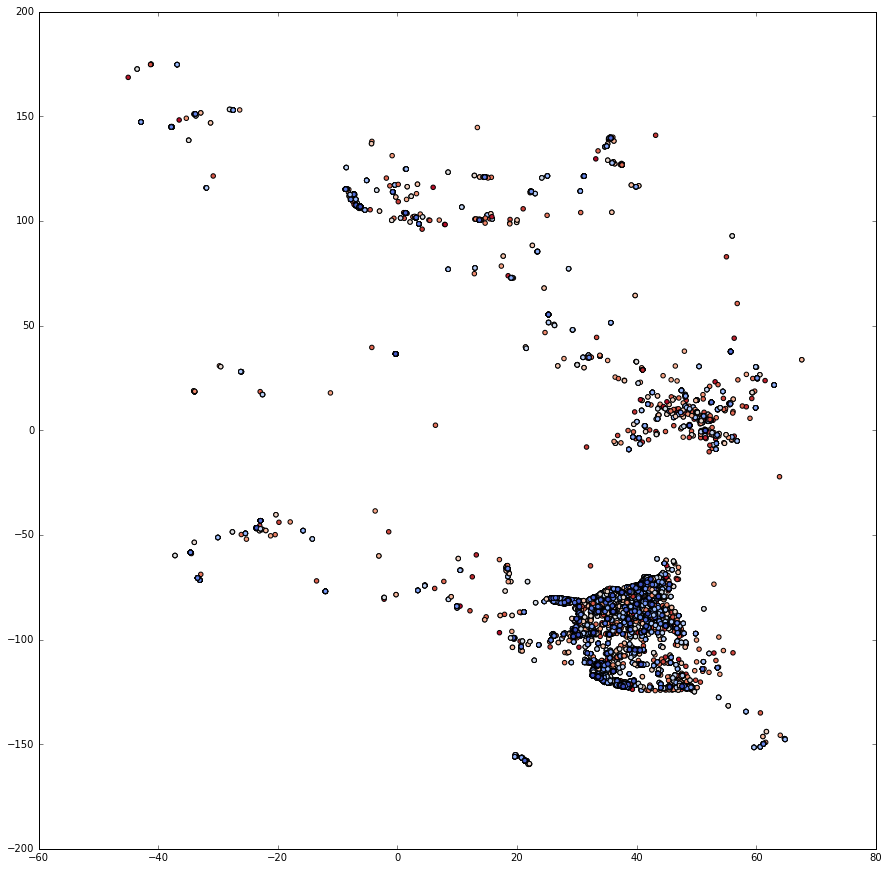

In [36]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,15))
plt.scatter(df[:100000]['latitude'].as_matrix(), df[:100000]['longitude'].as_matrix(), 
            cmap=plt.get_cmap('coolwarm'), c=clf.labels_)
plt.show()

In [42]:
from collections import Counter
counted_labels = Counter(clf.labels_)
filtered_labels = {k:v for (k, v) in counted_labels.items() if v > 15}

In [56]:
filtered_centers = clf.cluster_centers_[list(filtered_labels.keys()), :]

In [68]:
def get_closest_spots(spots):
    office_coords = np.array([[33.751277, -118.188740], 
                     [25.867736, -80.324116], 
                     [51.503016, -0.075479], 
                     [52.378894, 4.885084], 
                     [39.366487, 117.036146], 
                     [-33.868457, 151.205134]])
    closest = {}
    for coord in spots:
        tmp = np.inf
        for office in office_coords:
            dist = np.linalg.norm(coord-office)
            if dist < tmp:
                tmp = dist
        closest[tmp] = coord
    
    keys = list(closest.keys())
    keys.sort()
    keys = keys[:20]
    dots = []
    for k in keys:
        dots.append(closest[k])
    return np.array(dots)

In [69]:
closest_20 = get_closest_spots(filtered_centers)

In [74]:
import csv

with open('/Users/oneinchman/Documents/Git-repositories/MIPT-ML/Structure in data/Week 1/closest.txt', 'w') as f:
    for line in closest_20:
        csv.writer(f).writerow(line)